In [1]:
import sys, os #imp
from functools import reduce
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import nasdaqdatalink as ndl
import yaml
from tools import instruments
from tools.constants import SRF_CONTINUOUS_BO_DB_PATH
from tools.display import ohlc_chart, view, oi_chart, metrics_chart, index_chart
import backtesting as bt
import re
from tools.display import MyFormatter

In [2]:
with open('03.전략연구/systems/system2.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': 'testSystem', 'description': '시스템 설명', 'sectors': 'default', 'instruments': ['AD'], 'from_date': '2019-08-01', 'to_date': None, 'principal': 1000000, 'heat_system': 'DefaultHeat', 'max_system_heat': 0.3, 'max_sector_heat': 0.3, 'max_trade_heat': 0.01, 'max_lots': 100, 'commission': 5.98, 'skid': 0.25, 'metrics': [['ema30', 'EMA', 'window=30'], ['ema5', 'EMA', 'window=5'], ['min30', 'MIN', 'window=30'], ['max300', 'MAX', 'window=300']], 'entry_rule': {'long': 'ema5>ema30', 'short': None}, 'exit_rule': {'long': 'ema5<ema30', 'short': None}, 'stop_rule': {'long': 'min30', 'short': None}}


In [3]:
trader = bt.Trader(systems=[system1])
system = trader.systems[0]

In [4]:
%%time
trader.run()

매매시작
거래일: 2019-08-01 00:00:00, 시스템: testSystem 3.8886003494262695sec
거래일: 2019-08-02 00:00:00, 시스템: testSystem 0.002899169921875sec
거래일: 2019-08-05 00:00:00, 시스템: testSystem 0.001996278762817383sec
거래일: 2019-08-06 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2019-08-07 00:00:00, 시스템: testSystem 0.0019943714141845703sec
거래일: 2019-08-08 00:00:00, 시스템: testSystem 0.0009975433349609375sec
거래일: 2019-08-09 00:00:00, 시스템: testSystem 0.0009970664978027344sec
거래일: 2019-08-12 00:00:00, 시스템: testSystem 0.0029921531677246094sec
거래일: 2019-08-13 00:00:00, 시스템: testSystem 0.0009970664978027344sec
거래일: 2019-08-14 00:00:00, 시스템: testSystem 0.0019948482513427734sec
거래일: 2019-08-15 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2019-08-16 00:00:00, 시스템: testSystem 0.0019948482513427734sec
거래일: 2019-08-19 00:00:00, 시스템: testSystem 0.000997304916381836sec
거래일: 2019-08-20 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2019-08-21 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일

거래일: 2020-04-22 00:00:00, 시스템: testSystem 0.004986763000488281sec
거래일: 2020-04-23 00:00:00, 시스템: testSystem 0.005983829498291016sec
거래일: 2020-04-24 00:00:00, 시스템: testSystem 0.006981372833251953sec
거래일: 2020-04-27 00:00:00, 시스템: testSystem 0.0069811344146728516sec
거래일: 2020-04-28 00:00:00, 시스템: testSystem 0.007979154586791992sec
거래일: 2020-04-29 00:00:00, 시스템: testSystem 0.0069811344146728516sec
거래일: 2020-04-30 00:00:00, 시스템: testSystem 0.006981372833251953sec
거래일: 2020-05-01 00:00:00, 시스템: testSystem 0.006981372833251953sec
거래일: 2020-05-04 00:00:00, 시스템: testSystem 0.007978677749633789sec
거래일: 2020-05-05 00:00:00, 시스템: testSystem 0.007978439331054688sec
거래일: 2020-05-06 00:00:00, 시스템: testSystem 0.008976221084594727sec
거래일: 2020-05-07 00:00:00, 시스템: testSystem 0.010970592498779297sec
거래일: 2020-05-08 00:00:00, 시스템: testSystem 0.009973287582397461sec
거래일: 2020-05-11 00:00:00, 시스템: testSystem 0.011967897415161133sec
거래일: 2020-05-12 00:00:00, 시스템: testSystem 0.01296544075012207sec
거래일: 2020

거래일: 2020-12-07 00:00:00, 시스템: testSystem 0.01795196533203125sec
거래일: 2020-12-08 00:00:00, 시스템: testSystem 0.01797938346862793sec
거래일: 2020-12-09 00:00:00, 시스템: testSystem 0.0189211368560791sec
거래일: 2020-12-10 00:00:00, 시스템: testSystem 0.018948793411254883sec
거래일: 2020-12-11 00:00:00, 시스템: testSystem 0.019946813583374023sec
거래일: 2020-12-14 00:00:00, 시스템: testSystem 0.020972251892089844sec
거래일: 2020-12-15 00:00:00, 시스템: testSystem 0.02091693878173828sec
거래일: 2020-12-16 00:00:00, 시스템: testSystem 0.02293872833251953sec
거래일: 2020-12-17 00:00:00, 시스템: testSystem 0.02293848991394043sec
거래일: 2020-12-18 00:00:00, 시스템: testSystem 0.023935794830322266sec
거래일: 2020-12-21 00:00:00, 시스템: testSystem 0.023957490921020508sec
거래일: 2020-12-22 00:00:00, 시스템: testSystem 0.027904033660888672sec
거래일: 2020-12-23 00:00:00, 시스템: testSystem 0.026927947998046875sec
거래일: 2020-12-24 00:00:00, 시스템: testSystem 0.02593064308166504sec
거래일: 2020-12-28 00:00:00, 시스템: testSystem 0.02792501449584961sec
거래일: 2020-12-29 00:

거래일: 2021-11-02 00:00:00, 시스템: testSystem 0.013962745666503906sec
거래일: 2021-11-03 00:00:00, 시스템: testSystem 0.01495981216430664sec
거래일: 2021-11-04 00:00:00, 시스템: testSystem 0.014986991882324219sec
거래일: 2021-11-05 00:00:00, 시스템: testSystem 0.01495981216430664sec
거래일: 2021-11-08 00:00:00, 시스템: testSystem 0.015957117080688477sec
거래일: 2021-11-09 00:00:00, 시스템: testSystem 0.016957759857177734sec
거래일: 2021-11-10 00:00:00, 시스템: testSystem 0.016948699951171875sec
거래일: 2021-11-11 00:00:00, 시스템: testSystem 0.008951425552368164sec
거래일: 2021-11-12 00:00:00, 시스템: testSystem 0.002024412155151367sec
거래일: 2021-11-15 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2021-11-16 00:00:00, 시스템: testSystem 0.0019922256469726562sec
거래일: 2021-11-17 00:00:00, 시스템: testSystem 0.000997304916381836sec
거래일: 2021-11-18 00:00:00, 시스템: testSystem 0.0019948482513427734sec
거래일: 2021-11-19 00:00:00, 시스템: testSystem 0.0019941329956054688sec
거래일: 2021-11-22 00:00:00, 시스템: testSystem 0.0019683837890625sec
거래일: 2021-1

,투자금,최종자산,총손익,Bliss,CAGR,MDD,손익비,승률,위험대비손익,평균손익,평균수익,평균손실,보유기간,매매회수
Result,"1,000,000","1,046,878",4.7%,0.000,1.7%,69.9%,-1.10,43.4%,8.4%,182,"4,559","-3,181",46 일,290


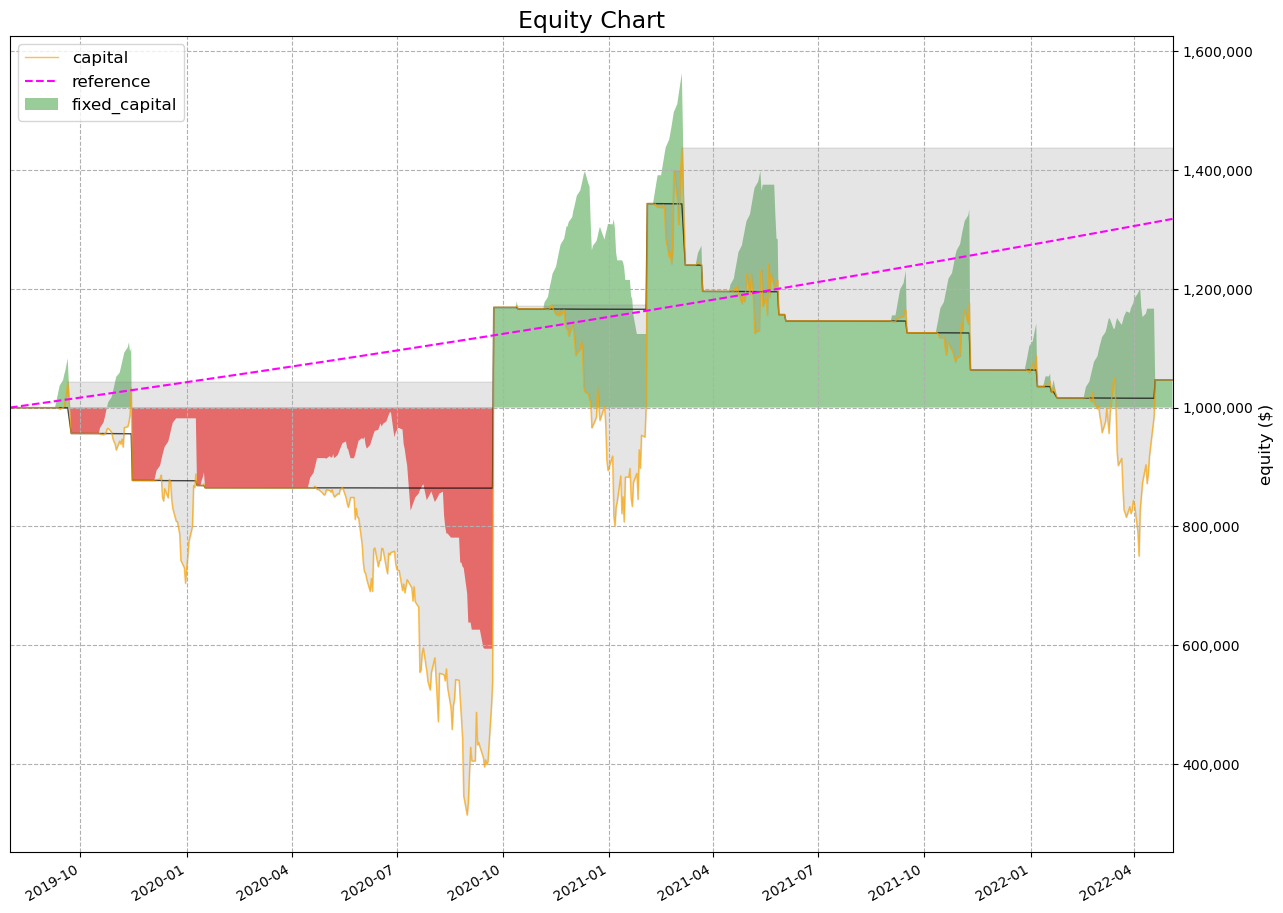

In [5]:
system.summary(level=0)

In [6]:
system.summary(level=1)

,총손익,평균손익,표준편차,위험대비손익,승률,보유기간,매매회수
구분,,,,,,,
currency,52810,182,4789.41,8.37%,43.4%,46.037931,290


,총손익,총손익(틱),평균손익(틱),위험대비손익,승률,보유기간,매매회수
결과,"52,810","38,782",134,8.37%,43.4%,46,290


,entrydate,exitdate,position,entryprice,entrylots,entryrisk,#exits,profit,profit_ticks,duration,result
0,2019-09-10,2019-09-23,Long,0.69260,5,9200.0,1,-5025.0,-201,13,LOSE
1,2019-09-11,2019-09-23,Long,0.69270,5,9250.0,1,-5075.0,-203,12,LOSE
2,2019-09-12,2019-09-23,Long,0.69265,5,9225.0,1,-5050.0,-202,11,LOSE
3,2019-09-13,2019-09-23,Long,0.69300,5,9400.0,1,-5225.0,-209,10,LOSE
4,2019-09-16,2019-09-23,Long,0.69300,5,9400.0,1,-5225.0,-209,7,LOSE
...,...,...,...,...,...,...,...,...,...,...,...
285,2022-04-06,2022-04-19,Long,0.75905,1,4850.0,1,-2345.0,-469,13,LOSE
286,2022-04-07,2022-04-19,Long,0.75205,2,7420.0,1,-3290.0,-329,12,LOSE
287,2022-04-08,2022-04-19,Long,0.74905,2,6330.0,1,-2690.0,-269,11,LOSE
288,2022-04-11,2022-04-19,Long,0.74695,2,5910.0,1,-2270.0,-227,8,LOSE


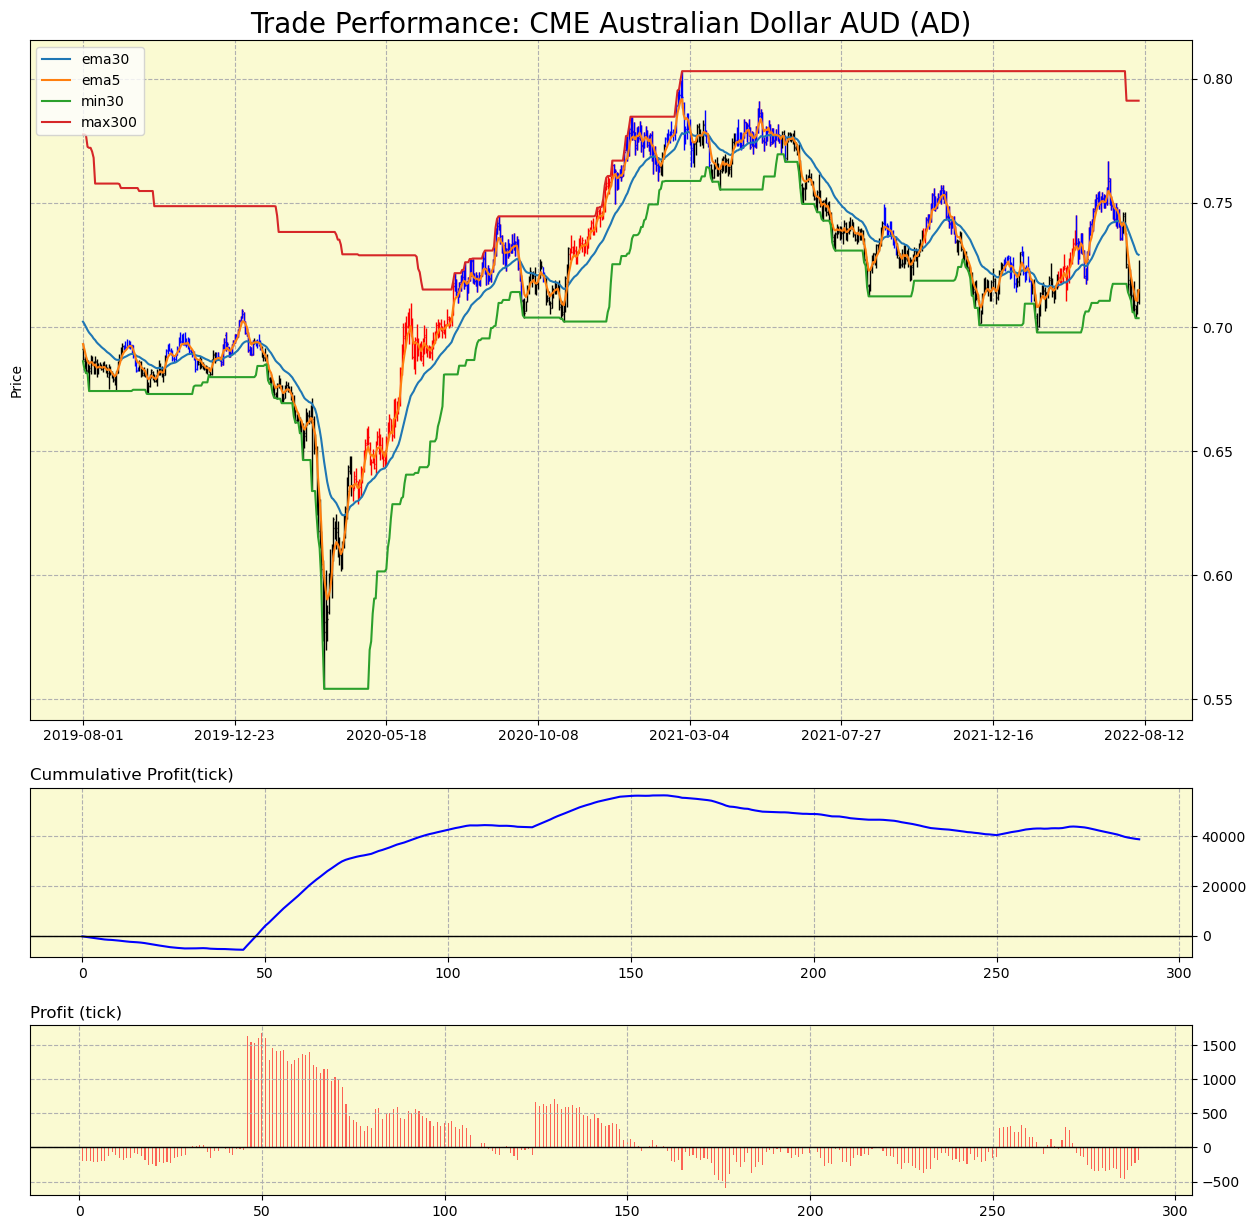

In [7]:
system.detail_result('AD')#, start='2015-10-01', end='2016-01-13')

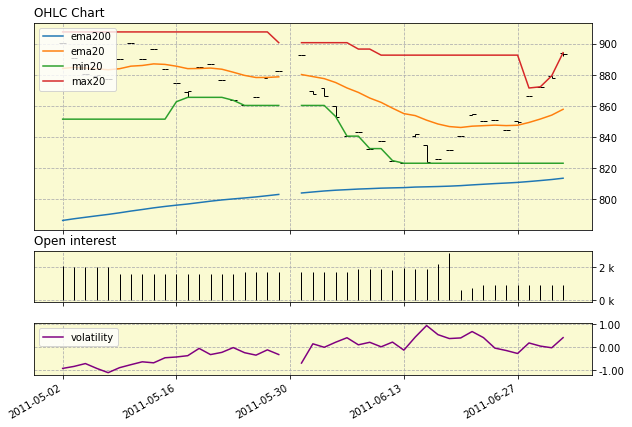

In [38]:
view(quotes, metrics=metrics)

In [8]:
system.signals

AD                    
           enter_long exit_long stop_long
date                                     
1959-08-03        NaN       NaN       NaN
1959-08-04        NaN       NaN       NaN
1959-08-05        NaN       NaN       NaN
1959-08-06        NaN       NaN       NaN
1959-08-07        NaN       NaN       NaN
...               ...       ...       ...
2022-04-28      False      True   0.70595
2022-04-29      False      True   0.70595
2022-05-02      False      True   0.70355
2022-05-03      False      True   0.70355
2022-05-04      False      True   0.70355

[16028 rows x 3 columns]

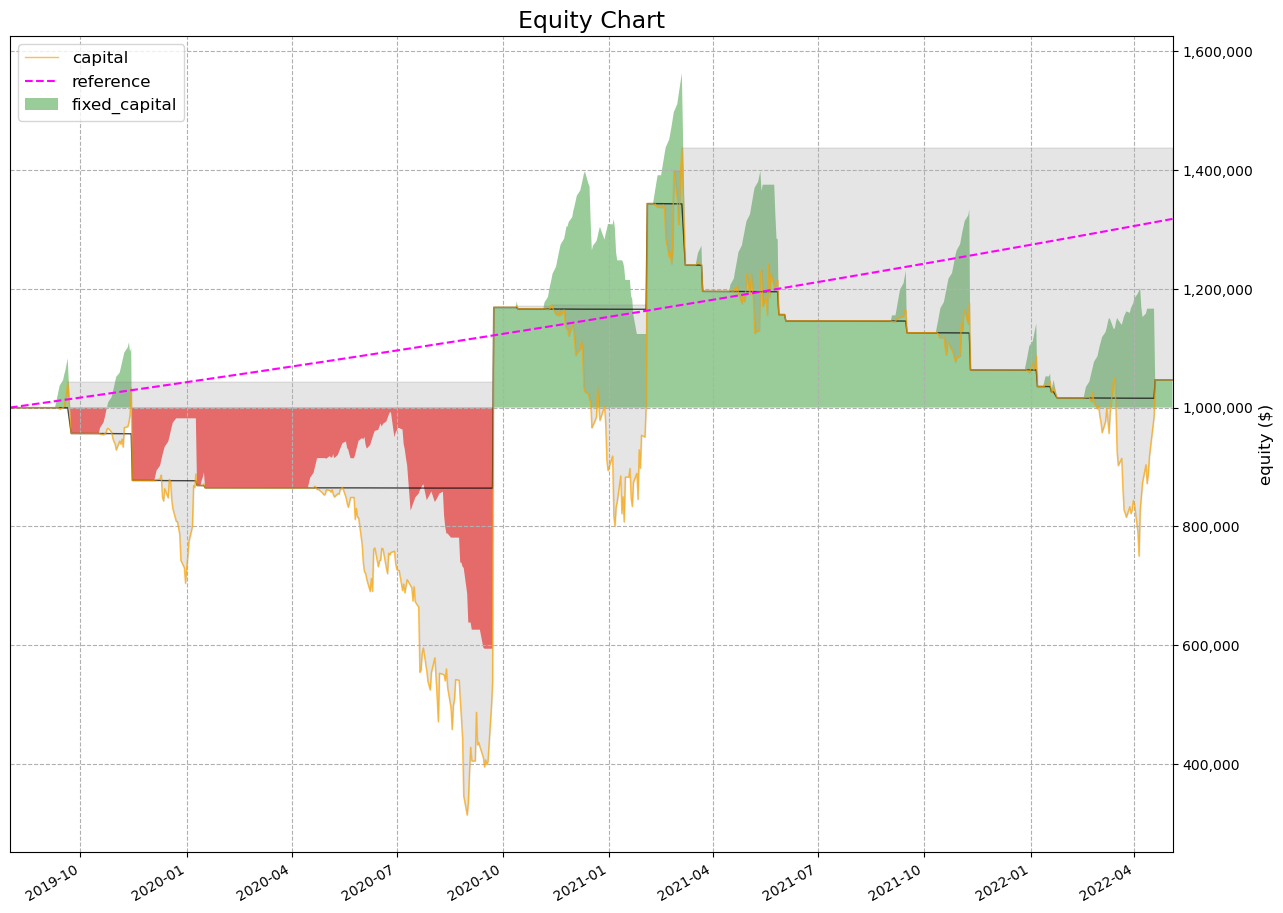

In [6]:
a=system.equity_plot()

In [7]:
type(a)

matplotlib.figure.Figure

In [ ]:
buf = io.BytesIO()
plt.savefig(buf, format='svg')
buf.seek(0)
img = svg2rlg(buf)

In [21]:
quotes = trader.loc[start:end].dropna()
        tradelog = self.tradelog[self.tradelog.symbol == symbol]
        #tradelog = tradelog[tradelog.symbol == symbol]
        
        
        if start and end:
            trade = tradelog[ (start <= tradelog.entrydate) & (tradelog.exitdate <= end)]
        else:
            trade = tradelog
        
        cumprofit = trade.profit.cumsum()
        num_trades = len(trade)
        
        fig, (ax) = plt.subplots(2,1, figsize=(15,10),
                                gridspec_kw = {'height_ratios':[3,1]})
        
        #price chart
        ax[0] = ohlc_chart(ax[0], feed, linewidth=0.8)
        for idx, row in trade.iterrows():
            y=feed.loc[row['entrydate']:row['exitdate']]
            colors=['red','red'] if row['position']=='Long' else ['blue','blue']
            ax[0] = ohlc_chart(ax[0], y, colors=colors)
        ax[0].plot(feed[['top','bottom']].shift(1), color='green', linewidth=0.8)
        #tick profit chart
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Long', trade.tick, 0), 0.3, color='red', alpha=0.6 )
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Short', trade.tick, 0), 0.3, color='blue', alpha=0.6 )
           
        #labels
        name = self.pinfo[symbol]['name']
        ax[0].set_title(name, fontsize=20)
        ax[0].set_ylabel('Price', fontsize=15)
        ax[1].set_ylabel('Profit (tick)', fontsize=15)
       
        #styles
        ax[1].axhline(y=0, linewidth=1, color='darkgrey')
        ax[1].yaxis.tick_right()
        ax[1].set_facecolor('lightgoldenrodyellow')
        ax[1].set_xticks(range(1,num_trades+1))
        ax[1].grid(linestyle='--')

'NYMEX WTI Crude Oil'

In [24]:
table['duration'].mean()

35.285714285714285

In [25]:
df.columns

Index(['id', 'entrydate', 'name', 'symbol', 'sector', 'position', 'entryprice',
       'entrylots', 'entryrisk', 'entryrisk_ticks', 'exits', 'currentprice',
       'stopprice', 'risk', 'risk_ticks', 'lots', 'flame', 'profit',
       'duration', 'exittype', 'result', 'on_fire'],
      dtype='object')

In [6]:
df=pd.DataFrame(system.equity.log())

In [7]:
df2 = df.set_index('date')

In [46]:
from reportlab.pdfgen import canvas

In [57]:
def hello(c):
    c.drawString(100,100,"hello world")
    c.drawString(200,200,"안녕하세요")
    

In [58]:
c = canvas.Canvas("hello.pdf")

In [59]:
hello(c)

In [60]:
c.showPage()

In [61]:
c.save()

In [62]:
system

<<시스템: None>>

In [70]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter,A4
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont

fontname = 'Malgun Gothic'
pdfmetrics.registerFont(TTFont(fontname,'c:\Windows\fonts\malgun.ttf'))
p = canvas.Canvas('hello.pdf')
p.setFont(fontname,13)
p.drawString(100,100,u'안녕하세요')
p.showPage()
p.save() 

TTFError: Can't open file "c:\Windowsonts\malgun.ttf"

In [71]:
r"??df"

'??df'

In [64]:
import os

print(os.listdir(r'C:\Windows\fonts'))

['8514fix.fon', '8514fixe.fon', '8514fixg.fon', '8514fixr.fon', '8514fixt.fon', '8514oem.fon', '8514oeme.fon', '8514oemg.fon', '8514oemr.fon', '8514oemt.fon', '8514sys.fon', '8514syse.fon', '8514sysg.fon', '8514sysr.fon', '8514syst.fon', '85775.fon', '85855.fon', '85f1255.fon', '85f1256.fon', '85f1257.fon', '85f874.fon', '85s1255.fon', '85s1256.fon', '85s1257.fon', '85s874.fon', 'ahn_b.ttf', 'ahn_l.ttf', 'ahn_m.ttf', 'ALGER.TTF', 'ANTQUAB.TTF', 'ANTQUABI.TTF', 'ANTQUAI.TTF', 'app775.fon', 'app850.fon', 'app852.fon', 'app855.fon', 'app857.fon', 'app866.fon', 'app932.fon', 'app936.fon', 'app949.fon', 'app950.fon', 'arial.ttf', 'arialbd.ttf', 'arialbi.ttf', 'ariali.ttf', 'ARIALN.TTF', 'ARIALNB.TTF', 'ARIALNBI.TTF', 'ARIALNI.TTF', 'ARIALUNI.TTF', 'ariblk.ttf', 'bahnschrift.ttf', 'BASKVILL.TTF', 'batang.ttc', 'BAUHS93.TTF', 'BELL.TTF', 'BELLB.TTF', 'BELLI.TTF', 'BERNHC.TTF', 'BKANT.TTF', 'BOD_PSTC.TTF', 'BOOKOS.TTF', 'BOOKOSB.TTF', 'BOOKOSBI.TTF', 'BOOKOSI.TTF', 'BRITANIC.TTF', 'BRLNSB.TTF'

NameError: name 'FuncFormatter' is not defined

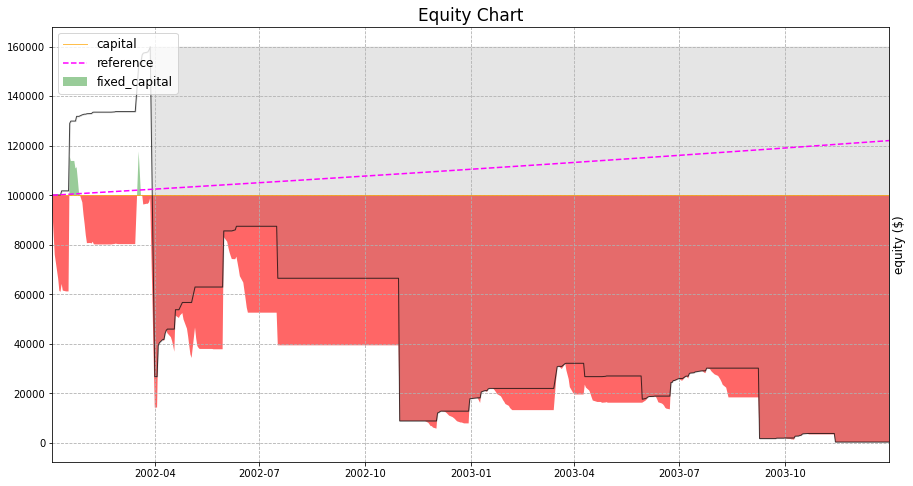

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.fill_between(x,p,fixed_capital, where=fixed_capital>=p, facecolor='green', alpha=0.4, interpolate=True, label='fixed_capital')
ax.fill_between(x, p, fixed_capital, where=fixed_capital<p, facecolor='red', alpha=0.6, interpolate=True)
ax.fill_between(x, capital, max_capital, color='grey', alpha=0.2)

ax.plot(x, principal, color='orange',alpha=0.7, linewidth=1, label='capital')
ax.plot(x, capital, color='black',alpha=0.7, linewidth=1)

ax.set_xlim([x.min(), x.max()])

#reference curve
rate = 0.1 #annual interest rate
refx = (x-x[0])/np.timedelta64(365,'D')
refy = p*np.exp(rate*refx)
ax.plot(x, refy, color='magenta', linestyle='--', label='reference')

#labels
ax.legend(loc='upper left', fontsize='large')
ax.set_title('Equity Chart', fontsize=17)

#ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('equity ($)', fontsize=12)
ax.yaxis.set_label_position("right")
#style
ax.grid(linestyle='--')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.tick_right()
fig.autofmt_xdate()
        
plt.show() 


In [11]:
class test:
    def __repr__(self):
        a={'a':1,'b':'sdf'}
        return f'{a}'

In [12]:
a=test()

In [13]:
b=[]

In [14]:
b.append(a)

In [17]:
b[0].name

11

In [10]:
df=pd.DataFrame(system.trades.log())

In [14]:
df.to_csv('test.csv')

In [16]:
df.to_html('tes.html')

In [22]:
df['exits'][1]

[{'exittype': 'exit',
  'exitdate': Timestamp('2019-09-23 00:00:00'),
  'exitprice': 0.6825500213623047,
  'exitlots': 5,
  'profit': -5075.0,
  'profit_ticks': -203,
  'duration': 12,
  'result': 'LOSE'}]

In [24]:
system.trades.log()[1]

{'id': 2,
 'entrydate': Timestamp('2019-09-11 00:00:00'),
 'exitdate': Timestamp('2019-09-23 00:00:00'),
 'name': 'CME Australian Dollar AUD',
 'symbol': 'AD',
 'sector': 'currency',
 'position': 'Long',
 'entryprice': 0.6926999884605408,
 'entrylots': 5,
 'entryrisk': 9250.0,
 'entryrisk_ticks': 370,
 'exits': [{'exittype': 'exit',
   'exitdate': Timestamp('2019-09-23 00:00:00'),
   'exitprice': 0.6825500213623047,
   'exitlots': 5,
   'profit': -5075.0,
   'profit_ticks': -203,
   'duration': 12,
   'result': 'LOSE'}],
 '#exits': 1,
 'currentprice': 0.6825500213623047,
 'stopprice': 0.6747000217437744,
 'risk': -0.0,
 'risk_ticks': -157,
 'lots': 0,
 'flame': 0.0,
 'profit': -5075.0,
 'profit_ticks': -203,
 'duration': 12,
 'exittype': 'exit',
 'result': 'LOSE',
 'on_fire': False}

In [27]:
system.trades.book[0]